<a href="https://colab.research.google.com/github/niloydebbarma-code/REG-Handbook/blob/main/Copy_of_EXOTIC_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXOTIC Advanced

<font face="Helvetica, Arial, Sans-Serif">
Need help? <a href="https://exoplanets.nasa.gov/exoplanet-watch/exotic/user-guide/" target="_blank">Consult the EXOTIC User Guide</a>.
</font>

In [10]:
#@title <font size=3><img src="https://exoplanets.nasa.gov/system/exotic/leftdownarrow_tall.png" height=18 hspace=8><b>Load EXOTIC libraries and mount Google Drive</b></font>

##############################################################
%%capture step_capture --no-display
# Comment the above statement out to see debugging information
##############################################################

##############################################################
#
# NOTE TO EXOTIC USER:
#
#   • To hide this code, double-click the title above ("Load telescope images"),
#     or click the arrow to the left of the title.
#
#   • Editing this code will only affect your local instance.
#     Reload to revert your changes.
#
##############################################################

# Import display libraries to allow html, css, and javascript for styling and interaction
from IPython.display import display, HTML, Javascript
display(HTML('<p class="bookend">START: Importing necessary software libraries</p>'))
display(HTML('<p class="hidden">Loading styles, please wait...</p>'))

# Install EXOTIC Colab interface code to provide styling and interaction features
# !pip install git+https://github.com/alienlifeform/exotic-colab.git --upgrade
!pip install --upgrade setuptools~=66.1
# !pip install --upgrade --use-deprecated=legacy-resolver git+https://github.com/alienlifeform/exotic-colab.git
!pip install --upgrade --use-deprecated=legacy-resolver git+https://github.com/rzellem/exotic-colab.git
!pip install importlib-metadata
from exoticcolab.display import setupDisplay, testImplementation, displayStep, makeContainer, downloadButton, appendToContainer, appendStepToContainer, expandableSection, expandableSectionCustom, hideWarning, showProgress, resize_colab_cell
# Set up custom Colab styles and interactions
setupDisplay()
# Improve how colab handles long code output fields
get_ipython().events.register('pre_run_cell', resize_colab_cell)

# Show progress
display(HTML('<ul class="step_container_1a"></ul>'))
appendStepToContainer('.step_container_1a','Styles loaded, importing libraries...')
showProgress(.3)

# Import graphing libraries
appendStepToContainer('.step_container_1a','(1/5) Bokeh.io')

import bokeh.io
from bokeh.io import output_notebook

# if bokeh.__version__ != "2.4.3":
#   !pip install bokeh==2.4.3
#   hideWarning()
# else:
#   showProgress(.3)

# Import EXOTIC
appendStepToContainer('.step_container_1a','(2/5) EXOTIC <span class="comment">(This will take up to a minute, please wait...)</span>')

try:
  from exotic.api.colab import *
  from exotic.api.plotting import plot_image
except ImportError:
  !pip install exotic --upgrade
  #!pip install git+https://github.com/alienlifeform/exotic-prototype.git --upgrade
  # This suppresses the "RESTART RUNTIME" button
  hideWarning()
  appendStepToContainer('.step_container_1a','<div class="attention"><b>Attention:</b> Due to installing new packages, please re-run this step by clicking the run arrow above again.</div>')
  hideWarning()
  import os
  os._exit(00)

# Import other utilities
appendStepToContainer('.step_container_1a','(3/5) NASAExoplanetArchive, Astropy, Utils')
from exotic.exotic import NASAExoplanetArchive, get_wcs, find_target
#from astropy.time import Time
#from barycorrpy import utc_tdb
#import numpy as np
#from io import BytesIO
#from astropy.io import fits
#from scipy.ndimage import label
#from bokeh.plotting import figure, output_file, show
#from bokeh.palettes import Viridis256
#from bokeh.models import ColorBar, LinearColorMapper, LogColorMapper, LogTicker
#from bokeh.models import BoxZoomTool,WheelZoomTool,ResetTool,HoverTool,PanTool,FreehandDrawTool
#from pprint import pprint
from IPython.display import Image
from ipywidgets import widgets, HBox
#from skimage.transform import rescale, resize, downscale_local_mean
#import copy
import os
import re
import json
#import subprocess
import glob

# Import matlab/stats (perhaps not necessary anymore)
appendStepToContainer('.step_container_1a','(4/5) Matlab, SciPy')
#import matplotlib.pyplot as plt
#from scipy.stats import gaussian_kde
showProgress(.3)

# Import Google Utils
appendStepToContainer('.step_container_1a','(5/5) Google Utils')
from google.colab import drive, files
showProgress(.3)

display(HTML('<p class="bookend">DONE: Importing necessary software libraries</p>'))

# Prepare user for loading of images
display(HTML('<p class="bookend">START: Mounting Google Drive</p>'))
display(HTML('<ul class="step_container_1b"></ul>'))
appendStepToContainer('.step_container_1b','<div class="attention"><b>Attention:</b> Be sure to "Permit this notebook to access your Google Drive files" if prompted.</div>')
showProgress(1)

# Mount the user's drive so we can access images
drive.mount('/content/drive', force_remount=True)

appendStepToContainer('.step_container_1b','Drive successfully mounted')

display(HTML('<p class="bookend">DONE: Mounting Google Drive.  <b>You may move on to the next step.</b></p>'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
#@title <font size=3><img src="https://exoplanets.nasa.gov/system/exotic/leftdownarrow_tall.png" height=18 hspace=8><b>Step 2: Load telescope images</b></font>

##############################################################
%%capture step_capture --no-display
# Comment the above statement out to see debugging information
##############################################################

##############################################################
#
# NOTE TO EXOTIC USER:
#
#   • To hide this code, double-click the title above ("Load telescope images"),
#     or click the arrow to the left of the title.
#
#   • Editing this code will only affect your local instance.
#     Reload to revert your changes.
#
##############################################################

setupDisplay()

# Prepare user for loading of images
display(HTML('<p class="bookend">START: Loading telescope images</p>'))
display(HTML('<ul class="step_container_2a"></ul>'))
appendStepToContainer('.step_container_2a','Ensuring images are loaded...</li>')
showProgress(1)

def clean_input_filepath(p):
  p = re.sub('^/content', '', p)
  p = re.sub('^/drive/MyDrive', '', p)
  p = re.sub('^/', '', p)
  return(p)

######################################################


expandableSectionCustom('<u>+ EXOTIC Inline Help:</u> How to Upload your .FITS images into Google Drive in way that EXOTIC can use them','<u>- Close EXOTIC Inline Help</u>','''
  <p><b>How to upload your .FITS images into Google Drive in way that EXOTIC can use them:</b></p>
  <blockquote>e.g. EXOTIC/HatP32Dec202017/</blockquote>

  <ol style="line-height:135%">
  <li>In another window, <a href="https://drive.google.com/drive/my-drive" target="newGoogleDrive">go to Google Drive</a>.</li>
  <li><u>In Google Drive</u>, <i>if you don't already have an EXOTIC folder</i>, right click on "My Drive" (in the left nav) and click New Folder. Name the folder "EXOTIC".</li>
  <li>Click the arrow next to "My Drive" to see the subfolders and click "EXOTIC".</li>
  <li><u>On your computer</u>, put your .FITS files into a single folder uniquely named for your observation (e.g. "HatP32Dec202017").</li>
  <li>From your filesystem, drag this folder into Google Drive where it says "Drop files here".</li>
  </ol>

  <p>You will use this path (e.g. "EXOTIC/HatP32Dec202017") when loading your images into EXOTIC.</p>
''')


expandableSectionCustom('<u>+ EXOTIC Inline Help:</u> How to find your .FITS images','<u>- Close EXOTIC Inline Help</u>','''
  <p><b>How to find your .FITS images:</b></p>

  <ol style="line-height:135%">
  <li>In the left nav, click on the folder icon.</li>
  <li>Navigate to your images, likely in /drive/MyDrive/ or /content/drive/MyDrive/.</li>
  <li>Right-click on the folder with your .FITS images and click "Copy Path".</li>
  </ol>

  <p>You will use this path (e.g. "EXOTIC/HatP32Dec202017" or "/content/drive/MyDrive/EXOTIC/HatP32Dec202017") when loading your images into EXOTIC.</p>
''')

# Ask for inputs until we find .fits files
fits_files_found = False
while not fits_files_found:
  # Ask for inputs until we find ANY files
  uploaded_files_found = False
  #appendStepToContainer('.step_container_2a','A valid Google Drive filepath should not include /drive/MyDrive/')
  while not uploaded_files_found:
    input_filepath = input('Enter path to .FITS images in Google Drive (i.e. "EXOTIC/HatP32Dec202017") and press return:  ')
    #display(HTML(f'<p class="output">input_filepath={input_filepath}</p>'))
    cleaned_filepath = clean_input_filepath(input_filepath)
    #display(HTML(f'<p class="output">cleaned_filepath={cleaned_filepath}</p>'))
    if cleaned_filepath:
      verified_filepath = check_dir(os.path.join("/content/drive/My Drive/", cleaned_filepath))
      #display(HTML(f'<p class="output">verified_filepath={verified_filepath}</p>'))

      if verified_filepath:
        output_dir = verified_filepath + "_output/"
        #display(HTML(f'<p class="output">output_dir={output_dir}</p>'))

        sorted_files = sorted(os.listdir(verified_filepath));
        #display(HTML(f'<p class="output">sortedFiles={sorted_files}</p>'))

        if sorted_files:
          uploaded_files_found = True # exit inner loop and continue
        else:
          display(HTML(f'<p class="error">Failed to find files at {verified_filepath}. You can click the folder icon in the left nav to browse your Google Drive directories.</p>'))
      else:
        display(HTML(f'<p class="error">Failed to find a folder at /content/drive/My Drive/{cleaned_filepath}. You can click the folder icon in the left nav to browse your Google Drive directories.</p>'))
    else:
      display(HTML(f'<p class="error">Filepath doesn\'t seem right: /content/drive/My Drive/{input_filepath}. You can click the folder icon in the left nav to browse your Google Drive directories.</p>'))


  # Directory full of files found, look for .fits and inits.json
  uploaded_files = [f for f in sorted_files if os.path.isfile(os.path.join(verified_filepath, f))]
  fits_count, inits_count, first_image = 0, 0, ""


  # Identify .FITS and inits.json files in user-submitted folder
  inits = []    # array of paths to any inits files found in the directory
  for f in uploaded_files:
    # Look for .fits images and keep count
    if re.search(r"\.f[itz]+s?\.?g?z?$", f, re.IGNORECASE):
      # Determine the first image
      if first_image == "":
        first_image = os.path.join(verified_filepath, f)
      fits_count += 1
    # Look for inits.json file(s)
    if re.search(r"\.json$", f, re.IGNORECASE):
      inits.append(os.path.join(verified_filepath, f))

  inits_count = len(inits)
  display(HTML(f'<p class="output"><br />Found {fits_count} image files and {inits_count} initialization files in the directory.</p>'))

  # Determine if folder has enough .FITS folders to move forward
  if fits_count >= 1:
    fits_files_found = True # exit outer loop and continue

    # Make the output directory if it does not exist already.
    if not os.path.isdir(output_dir):
      os.mkdir(output_dir)
      display(HTML(f'<p class="output">Creating output_dir at {output_dir}</p>'))
    output_dir_for_shell = output_dir.replace(" ", "\ ")
  else:
    display(HTML(f'<p class="error">Failed to find a significant number of .FITS files at {verified_filepath}</p>'))

# Read configuration from inits.json, if available
if inits_count == 1:                 # one inits file exists
  # Deal with inits.json file
  inits_file_path = os.path.join(verified_filepath, inits[0])
  inits_file_exists = True
  #display(HTML(f'<p class="output">Got an inits.json file here: {inits_file_path}</p>'))
  with open(inits_file_path) as i_file:
    display(HTML(f'<p class="output">Loading coordinates and input/output directories from inits file</p>'))
    inits_data = i_file.read()
    d = json.loads(inits_data)
    targ_coords = d["user_info"]["Target Star X & Y Pixel"]
    comp_coords = d["user_info"]["Comparison Star(s) X & Y Pixel"]
    input_dir = d["user_info"]["Directory with FITS files"]
    if input_dir != verified_filepath:
      display(HTML(f'<p class="error">The directory with fits files should be {verified_filepath} but your inits file says {input_dir}.</p>'))
      display(HTML('<p class="output">This may or may not cause problems.  Just letting you know.<p>'))
    display(HTML(f'<p class="output">Coordinates from your inits file:\ntarget: {targ_coords}\ncomps: {comp_coords}<p>'))
    output_dir = d["user_info"]["Directory to Save Plots"]
else:
  display(HTML(f'<p class="output">No valid inits.json file was found, we\'ll create it in the next step.<p>'))
  inits_file_exists = False

showProgress(1)
display(HTML('<p class="bookend">DONE: Loading telescope images</p>'))


######################################################

# Load planetary params if inits.json file does not yet exist
if not inits_file_exists:

  display(HTML('<p class="bookend">START: Download planetary parameters</p>'))

  planetary_params = ""
  while not planetary_params:
    target_is_valid = False
    while not target_is_valid:
      target=input('Please enter the name of your exoplanet target (i.e. "HAT-P-32 b") and press return: ')
      if target != "":
        target_is_valid = True
      else:
        display(HTML(f'<p class="error">Exoplanet target may not be blank.</p>'))
        starchart_image_url_is_valid = False

    display(HTML('<br /><ul class="step_container_2b"></ul>'))
    appendStepToContainer('.step_container_2b','Searching NASA Exoplanet Archive for "' + target + '"...')

    targ = NASAExoplanetArchive(planet=target)
    #appendStepToContainer('.step_container_2','Loading planet info')
    target = targ.planet_info()[0]

    if not targ.resolve_name():
      appendStepToContainer('.step_container_2b','''
      Sorry, we can\'t find your target in the Exoplanet Archive.  Unfortunately, this
      isn't going to work until we can find it. Please try
      different formats for your target name, until the target is located.
      Looking it up in the NASA Exoplanet Archive at https://exoplanetarchive.ipac.caltech.edu/
      might help you know where to put the spaces and hyphens and such.
      ''')
      appendStepToContainer('.step_container_2b','''
      If your target is a candidate, you may need to create your own inits.json file and
      add it to the folder with your FITS images.
      ''')
    else:
      appendStepToContainer('.step_container_2b','Found target "' + target + '" in the NASA Exoplanet Archive')
      p_param_string = targ.planet_info(fancy=True)
      planetary_params = '"planetary_parameters": ' + p_param_string
      p_param_dict = json.loads(p_param_string)
      planetary_params = fix_planetary_params(p_param_dict)
      appendStepToContainer('.step_container_2b','Loading NASA Exoplanet Archive planetary parameters for ' + target)
      display(HTML(f'<pre class="output">{planetary_params}</pre>'))


  expandableSectionCustom('<u>+ EXOTIC Inline Help:</u> How to get an AAVSO Observer code','<u>- Close EXOTIC Inline Help</u>','''
    <p><b>How to get an AAVSO Observer code:</b></p>
    Follow the instructions at the <a href="https://www.aavso.org/new-observers#:~:text=If%20you%20do%20not%20yet,for%20%22Request%20an%20obscode%22." target="_blank">AAVSO "New Observers" page</a>.
  ''')

  # Prompt for AAVSO code
  aavso_obs_code = input("Enter your AAVSO Observer code or press return to skip: ")
  if aavso_obs_code:
    sec_obs_code = input("Enter a secondary AAVSO Observer code or press return to skip: ")
  else:
    sec_obs_code = ""

  display(HTML('<p class="bookend">DONE: Download planetary parameters. <b>You may move on to the next step.</b></p>'))

else:

  display(HTML('<p class="bookend">DONE: Inits.json file exists. <b>You may move on to step 4.</b></p>'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Enter path to .FITS images in Google Drive (i.e. "EXOTIC/HatP32Dec202017") and press return:  /content/drive/MyDrive/WASP-98 b


Please enter the name of your exoplanet target (i.e. "HAT-P-32 b") and press return: WASP-98 b


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Enter your AAVSO Observer code or press return to skip: BNIE
Enter a secondary AAVSO Observer code or press return to skip: MOSB


In [12]:
#@title <font size=3><img src="https://exoplanets.nasa.gov/system/exotic/leftdownarrow_tall.png" height=18 hspace=8><b>Step 3: Identify target and comparison stars in a telescope image</b></font>

##############################################################
#
# NOTE TO EXOTIC USER:
#
#   • To hide this code, double-click the title above the code,
#     or click the arrow to the left of the title.
#
#   • Editing this code will only affect your local instance.
#     Reload to revert your changes.
#
##############################################################


#@markdown <font face="Helvetica, Arial, Sans-Serif" size=2>
#@markdown Select your telescope and target host star (e.g. "HAT-P-32"), then press <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABUAAAAVCAYAAACpF6WWAAABV2lDQ1BJQ0MgUHJvZmlsZQAAKJFjYGBiSSwoyGFhYGDIzSspCnJ3UoiIjFJgf8bAycABhEIMbInJxQWOAQE+QCUMMBoVfLvGwAiiL+uCzJr3s/Z77Blu8WhFRuc9VUV3MNWjAK6U1OJkIP0HiLWSC4pKGBgYNYDsgPKSAhC7AsgWKQI6CsjuAbHTIewFIHYShL0FrCYkyBnIPgFkCyRnJKYA2TeAbJ0kJPF0JHZuTmky1A0g1/Ok5oUGA2k+IJZh8GAIYFBgMALCSoYMYNhgV2sCVuvMkM9QAFRXxJDJkA5UXQLU6QgUKWDIYUgFsj0Z8hiSGfQYdMAmGoBMBYUxetghxPIXMTBYfGVgYJ6AEEuaycCwvZWBQeIWQkwFGAb8LQwM284XJBYlwkOU8RtLcZqxEYTN48TAwHrv///PagwM7JMZGP5O+P//96L///8uBpoPjJsDeQDaFGLQdABjBAAAAFZlWElmTU0AKgAAAAgAAYdpAAQAAAABAAAAGgAAAAAAA5KGAAcAAAASAAAARKACAAQAAAABAAAAFaADAAQAAAABAAAAFQAAAABBU0NJSQAAAFNjcmVlbnNob3TrIl/MAAAB1GlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNi4wLjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyI+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj4yMTwvZXhpZjpQaXhlbFlEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWERpbWVuc2lvbj4yMTwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlVzZXJDb21tZW50PlNjcmVlbnNob3Q8L2V4aWY6VXNlckNvbW1lbnQ+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqn5DzTAAABCUlEQVQ4Ea2UQQ6EIAxFdTIXYu1tdOtx2OptXHukmflkPmkrQklsQoAOffyWjuPnZ8PD9nqYl3Bu6HmeA4bH3rVD27YlkIWFEAaMZVmK4WOppoDt+14MsM4YY7pA+i/QHiBB8zwr1aqmSNOrkEDMiIEYmlI6TRP9akb9bF3Vgf/mOI60ykrlTTYAD4IUW0ZGhraUAFx6FHkRGW4oglGGGlhBuZG31tYtcFIKBT2G2t0JASv/ozwvDFit5Sgu15SOO8UtIOLIcPXp3UXWf+lTHPD0ogVxj8ej5fTh8DY5gzlDDFOHT6XPQ3jZdV25rc72Y4LDRSgpbB3bPlCF0fU9JVTOBMs05e9y/QUaNJJ8hZpK/QAAAABJRU5ErkJggg=="> to the left (or shift-return).
#@markdown </font>
Telescope = 'MicroObservatory' #@param ["Select a Telescope", "MicroObservatory", "Exoplanet Watch .4 Meter", "FOV: 900 arcmin", "FOV: 450 arcmin", "FOV: 180 arcmin", "FOV: 120 arcmin", "FOV: 60 arcmin", "FOV: 30 arcmin", "FOV: 18.5 arcmin", "FOV: 7.5 arcmin", "Other"]
Star = 'WASP-98' #@param {type:"string"}
Target = Star

setupDisplay()

# If the user presses enter to run the sample data, download sample data if needed and
# put it into a sample-data directory at the top level of the user's Gdrive.  Count
# the .fits files (images) and .json files (inits files) in the directory entered
# by the user (or in the sample-data directory if the user pressed enter).  If
# there are at least 20 .fits files, assume this is a directory of images and display
# the first one in the series.  If there is exactly one inits file in the directory,
# show the specified target and comp coords so that the user can check these against
# the displayed image.  Otherwise, prompt for target / comp coords and make an inits
# file based  on those (save this new inits file in the folder with the output files
# so that the student can consult it later).  Finally, run EXOTIC with the newly-made
# or pre-existing inits file, plus any other inits files in the directory.

#########################################################

import urllib
from urllib.request import urlopen
from urllib.error import HTTPError

def get_star_chart_urls(telescope, star_target):
  t_resolution=150
  if telescope == 'MicroObservatory':
    t_fov=56.44
    t_maglimit=15
  elif telescope == 'Exoplanet Watch .4 Meter':
    t_fov=38.42
    t_maglimit=15
  elif telescope == 'FOV: 900 arcmin':
    t_fov=900
    t_maglimit=7.5
  elif telescope == 'FOV: 450 arcmin':
    t_fov=450
    t_maglimit=9
  elif telescope == 'FOV: 180 arcmin':
    t_fov=180
    t_maglimit=10.5
  elif telescope == 'FOV: 120 arcmin':
    t_fov=120
    t_maglimit=12
  elif telescope == 'FOV: 60 arcmin':
    t_fov=60
    t_maglimit=13.5
  elif telescope == 'FOV: 30 arcmin':
    t_fov=30
    t_maglimit=15.5
  elif telescope == 'FOV: 18.5 arcmin':
    t_fov=18.5
    t_maglimit=16
  elif telescope == 'FOV: 7.5 arcmin':
    t_fov=7.5
    t_maglimit=20
  else:
    # Should not get here
    t_fov=56.44
    t_maglimit=15
  json_url = f"https://app.aavso.org/vsp/api/chart/?star={star_target}&scale=D&orientation=CCD&type=chart&fov={t_fov}&maglimit={t_maglimit}&resolution={t_resolution}&north=down&east=left&format=json"
  starchart_url = f"https://app.aavso.org/vsp/?star={star_target}&scale=D&orientation=CCD&type=chart&fov={t_fov}&maglimit={t_maglimit}&resolution={t_resolution}&north=down&east=left"
  return [json_url, starchart_url]

def get_star_chart_image_url(json_url):
  display(HTML(f'<p class="output">Searching for startchart at {json_url}</p>'))
  with urllib.request.urlopen(json_url) as url:
    starchart_data = json.load(url)
    image_uri = starchart_data["image_uri"].split('?')[0]
    display(HTML(f'<p class="output">Pulling starchart JSON to find image url... found: {image_uri}</p>'))
    return(image_uri)

if not inits_file_exists:
  if fits_files_found:

    if Telescope == 'Select a Telescope' or not Target:
      display(HTML('<span class="error">You must enter a Telescope and Target Host Star (e.g. "HAT-P-32") to run this step.</span>'))
    else:
      display(HTML('<p class="bookend">START: Generate AAVSO StarChart</p>'))

      #display(HTML('<br /><p><b>Option A:</b> Enter a telescope and target star to generate an AAVSO starchart image URL.'))


      starchart_image_url = ''
      starchart_image_url_is_valid = False
      prompt_for_url = True

      display(HTML(f'<p class="output">Telescope was selected: {Telescope}</p>'))
      display(HTML(f'<p class="output">Target Host Star was selected: {Target}</p>'))

      starchart_urls = get_star_chart_urls(Telescope,Target)
      if Telescope != "Other":
        try:
          # Generate the starchart image url
          starchart_image_url = get_star_chart_image_url(starchart_urls[0])
          #display(HTML(f'<p class="output">starchart_image_url: {starchart_image_url}</p>'))
          starchart_image_url_is_valid = True
          prompt_for_url = False
        except HTTPError:
          display(HTML('<p class="error">Could not find a starchart matching that target host star.</p>'))
          display(HTML(f'<p class="error">Try a different target host star (make sure it\'s a star, not a planet) and click "run" once to stop, and again to re-run this step.</p>'))
          display(HTML(f'<p class="output">Or... <a href="{starchart_urls[1]}" target="_blank">use the advanced search on AAVSO</a> to find the URL of the image associated with your starchart.</p>'))
          prompt_for_url = True

      else:
        display(HTML(f'<p class="output"><a href="{starchart_urls[1]}" target="_blank">Use the advanced search on AAVSO</a> to find the URL of the image associated with your starchart.</p'))

      while prompt_for_url:

        #while not starchart_image_url_is_valid:
        starchart_image_url = input('Enter a valid starchart image URL and press return: ')
        if starchart_image_url.startswith('https://') and starchart_image_url.endswith('png'):
          display(HTML(f'<p class="output">Starchart Image URL is valid: {starchart_image_url}</p>'))
          starchart_image_url_is_valid = True
          prompt_for_url = False
        else:
          display(HTML(f'<p class="error">Starchart Image URL must begin with https:// and end with .png: {starchart_image_url}</p>'))
          display(HTML(f'<p class="output">If you found a starchart, click on the image and then grab the URL from your browser\'s URL bar.</p>'))
          starchart_image_url_is_valid = False




      ######################################################

      #appendToContainer('.comment','<div class="tooltip" style="display: none">TEST</div>')

      #########################################################

      display(HTML('<p class="bookend">START: Compare telescope image and star chart</p>'))
      display(HTML('<ul class="step_container_3b">'))

      # set up bokeh
      bokeh.io.output_notebook()
      sample_data = False

      #########################################################

      # show images
      if first_image:
        obs = ""
        # instructions for finding the target star
        if starchart_image_url:
          starchart_url_html = f'<img class="aavso_image" src="{starchart_image_url}">'
        else:
          starchart_url_html = ''

        display(HTML(f'''
        <div class="plots">
        {starchart_url_html}
        '''))
        display_image(first_image)
        display(HTML('</div><br clear="all"/>'))

        display(HTML('<h3>Data Entry 1 of 2: Enter coordinates for the target star</h3><br />'))
        # request coordinates and verify the entries are valid
        success = False
        while not success:
          targ_coords = input("Enter coordinates for target star - in the format [424,286] - and press return:  ")

          # check syntax and coords
          targ_coords = targ_coords.strip()
          tc_syntax = re.search(r"\[\d+, ?\d+\]$", targ_coords)
          if tc_syntax:
              success = True
          else:
            display(HTML('<p class="error">Try again, your syntax is not quite right: ' + targ_coords + ' needs to look like [424,286]</p>'))


        showProgress(2)

        # instructions for finding the comparison stars
        display(HTML('''
          <p class="output">Target star coordinates saved to inits.json</p>
          <h3>Data Entry 2 of 2: Enter coordinates for at least two comparison stars.</h3><br />
          <h4> Note: if there are no comparison stars identified in your field, please select ~3-5 stars that are relatively close to your target star and that are as bright, if not brighter, than your target star.</h4>
        '''))

        # request coordinates and verify the entries are valid
        success = False
        while not success:
          comp_coords = input("Enter coordinates for the comparison stars - in the format [[326,365],[416,343]] - and press return:  ")

          # check syntax
          comp_coords = comp_coords.strip()
          cc_syntax = re.search(r"\[(\[\d+, ?\d+\],? ?)+\]$", comp_coords)
          if cc_syntax:
            #display(HTML('<p class="output">Syntax OK:  [[x1,y1],[x2,y2]] e.g. ' + comp_coords + '</p>'))
            success = True
          else:
            display(HTML('<p class="error">Try again, your syntax is not quite right: ' + comp_coords + ' needs to look more like [[326,365],[416,343]]</p>'))

        display(HTML('<p class="output">Comparison star coordinates saved to inits.json</p>'))

        inits_file_path = make_inits_file(planetary_params, verified_filepath, output_dir, first_image, targ_coords, comp_coords, obs, aavso_obs_code, sec_obs_code, sample_data)
        showProgress(1)

        if inits_file_path:
          display(HTML('<p class="bookend">DONE: Compare telescope image and starchart. <b>You may move on to the next step.</b></p>'))
        else:
          display(HTML('<p class="error">Warning: No inits.json path created. This is unexpected.</p>'))

      else:

        display(HTML('<p class="bookend">DONE: First .FITS image not found. <b>Please go back to step 2 and load your .FITS images.</b></p>'))

  else:

    display(HTML('<p class="bookend">DONE: .FITS files not loaded. <b>Please go back to step 2 and load your .FITS images.</b></p>'))

else:

  display(HTML(f'''
    <p class="bookend">No need to run this step, since your inits.json file already exists at {inits_file_path}.
    <br /><b>Move on to step 4,</b> or remove the file and re-run steps 2 and 3 to generate a new one.</p>
    '''))



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Enter coordinates for target star - in the format [424,286] - and press return:  [45,260]


Enter coordinates for the comparison stars - in the format [[326,365],[416,343]] - and press return:  [[52,127],[37,275],[196,392],[145,92],[441,178],[115,289],[157,250],[61,278],[180,390],[294,460],[283,31],[136,481],[176,366],[180,41],[88,291],[263,143],[79,482],[77,271],[62,150],[337,329],[23,365],[294,230],[239,175],[74,139],[305,24],[275,38],[153,37],[312,169],[308,113],[254,99],[292,368],[163,15],[130,376],[348,64],[129,461],[343,352],[115,454],[273,244],[443,458],[455,350],[338,233],[192,38],[104,50],[250,353],[429,26],[67,398],[219,60],[370,196],[271,335],[90,251],[360,329],[382,425],[380,238],[10,178],[294,348],[160,299],[348,16],[58,463],[395,369],[160,354],[109,99],[131,35],[92,91],[409,404],[321,206],[354,101],[312,434],[147,434],[482,349],[327,304],[218,470],[51,112],[238,328],[276,309],[270,124],[73,404],[263,201],[462,436],[373,486],[280,127],[336,405],[67,260],[234,126],[270,78],[192,317],[187,209],[232,258],[34,490],[463,418],[210,467],[316,250],[461,288],[35,363],[45,

Created: /content/drive/My Drive/WASP-98 b_output/inits.json
This folder will also contain the output files when EXOTIC finishes running.


You can edit the file by clicking the folder icon in the left nav,
navigating to the inits file at /content/drive/My Drive/WASP-98 b_output/inits.json, and double-clicking the file.

When you are done, save your changes, and proceed to the next step.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Path to the inits file(s) that will be used: /content/drive/My Drive/WASP-98 b_output/inits.json
!exotic -red "/content/drive/My Drive/WASP-98 b_output/inits.json" -ov
/usr/local/lib/python3.10/dist-packages/colour/utilities/verbose.py:265: ColourWarning: "vaab/colour" was detected in "sys.path", please define a "COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=True" environment variable to import its objects into "colour" namespace!
  warn(*args, **kwargs)  # noqa: B028
    Done!
Checking exotethys database...
Checking ephemerides database...
Checking photometry database...
Checking catalogues database...

*************************************************************
Welcome to the EXOplanet Transit Interpretation Code (EXOTIC)
Version 4.0.1
*************************************************************


**************************
Complete Reduction Routine
**************************

Would you like Comparison Stars added automatically from AAVSO? (y/n): y

How many Comparison Stars would y

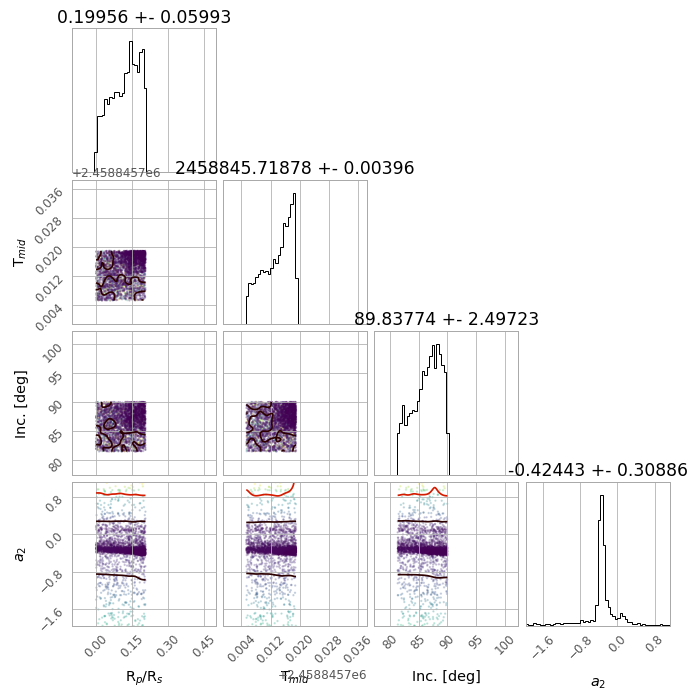

Button(description='Download data', style=ButtonStyle())

In [13]:
#@title <font size=3><img src="https://exoplanets.nasa.gov/system/exotic/leftdownarrow_tall.png" height=18 hspace=8><b>Step 4: Run EXOTIC to analyze telescope images</b></font>

##############################################################
#
# NOTE TO EXOTIC USER:
#
#   • To hide this code, double-click the title above the code,
#     or click the arrow to the left of the title.
#
#   • Editing this code will only affect your local instance.
#     Reload to revert your changes.
#
##############################################################

setupDisplay()

# If the user presses enter to run the sample data, download sample data if needed and
# put it into a sample-data directory at the top level of the user's Gdrive.  Count
# the .fits files (images) and .json files (inits files) in the directory entered
# by the user (or in the sample-data directory if the user pressed enter).  If
# there are at least 20 .fits files, assume this is a directory of images and display
# the first one in the series.  If there is exactly one inits file in the directory,
# show the specified target and comp coords so that the user can check these against
# the displayed image.  Otherwise, prompt for target / comp coords and make an inits
# file based  on those (save this new inits file in the folder with the output files
# so that the student can consult it later).  Finally, run EXOTIC with the newly-made
# or pre-existing inits file, plus any other inits files in the directory.

#########################################################

if 'inits_file_path' in globals():

  # p is the name of the folder entered by the user.  Decide what to do based on what
  # is found in the folder.
  display(HTML('<p class="bookend">START: Analyzing telescope images</p>'))
  #display(HTML("<p class='warning'>NOTE: At this point in EXOTIC, you would have the opportunity choose where to temporarily save the sample data. For this exercise, we're downloading to /content/EXOTIC/exotic-quick-start/sample-data/HatP32Dec202017"))
  display(HTML('<ul class="step5">'))

  #bokeh.io.output_notebook()
  sample_data = False

  print("Path to the inits file(s) that will be used: " + inits_file_path)

  commands = []
  with open(inits_file_path) as i_file:
    inits_data = i_file.read()
    d = json.loads(inits_data)
    date_obs = d["user_info"]["Observation date"]
    planet = d["planetary_parameters"]["Planet Name"]
    output_dir = d["user_info"]["Directory to Save Plots"]
    if not os.path.isdir(output_dir):
      os.makedirs(output_dir)
    inits_file_for_shell = inits_file_path.replace(" ", "\\ ")
    run_exotic = str(f"exotic -red {inits_file_for_shell} -ov")
    debug_exotic_run = str(f"!exotic -red \"{inits_file_path}\" -ov")

    commands.append({"inits_file_for_shell": inits_file_for_shell, "output_dir": output_dir,
                      "planet": planet, "date_obs": date_obs,
                      "run_exotic": run_exotic, "debug_exotic_run": debug_exotic_run
                      })
    print(f"{debug_exotic_run}")
    !eval "$run_exotic"

    file_for_submission = os.path.join(output_dir,"AAVSO_"+planet+"_"+date_obs+".txt")
    lightcurve = os.path.join(output_dir,"FinalLightCurve_"+planet+"_"+date_obs+".png")
    fov = os.path.join(output_dir,"temp/FOV_"+planet+"_"+date_obs+"_LinearStretch.png")
    triangle = os.path.join(output_dir,"temp/Triangle_"+planet+"_"+date_obs+".png")

    print(f"aavso output: {file_for_submission}\nlightcurve: {lightcurve}\nfov: {fov}\ntriangle: {triangle}")

    if not (os.path.isfile(lightcurve) and os.path.isfile(fov) and os.path.isfile(triangle)):
      print(f"Something went wrong with {planet} {date_obs}.\nCopy the command below into a new cell and run to find the error:\n{debug_exotic_run}\n")

    imageA = widgets.Image(value=open(lightcurve, 'rb').read())
    imageB = widgets.Image(value=open(fov, 'rb').read())
    hbox = HBox([imageB, imageA])
    display(hbox)
    display(Image(filename=triangle))


  ###

  display(HTML('<p class="bookend">DONE: Analyzing telescope images. </p>'))

  showProgress(3)

  display(HTML(f'''

    <h2>Congratulations!</h2>
    <h3>You have successfully generated a lightcurve showing the possible transit of {planet}</h3>

    <li class="step">Click to download the data to your hard drive in a format suitable for submission to AAVSO, (or find it by clicking the folder icon in the left nav and navigating to {file_for_submission})</li>

  '''))


  # Allow download of lightcurve data
  def on_dl_button_clicked(b):
    # Display the message within the output widget.
    if os.path.isfile(file_for_submission):
      display(HTML('<p>Downloading lightcurve data...</p>'))
      showProgress(2)
      files.download(file_for_submission)
    else:
      display(HTML('<p>Couldn\'t find output file.</p>'))

  dl_button = widgets.Button(description="Download data")
  dl_button.on_click(on_dl_button_clicked)
  display(HTML('<br /><hr /><br />'))
  display(dl_button)

else:
  display(HTML('<p class="bookend">Couldn\'t find inits.json file. <b>Return to step 2.</b></p>'))

---

## End

<font face="Helvetica, Arial, Sans-Serif">


What would you like to do next?
<br /><br />

<a href="https://app.aavso.org/exosite/submit">Submit your lightcurve to Exoplanet Watch via AAVSO</a>

<a href="https://exoplanets.nasa.gov/exoplanet-watch/about-exoplanet-watch/contact-us/">Provide feedback for this tutorial</a>


</font>